In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns 
import matplotlib.pyplot as plt
import plotly.express as px
import datetime
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/unemployment-in-india/Unemployment_Rate_upto_11_2020.csv
/kaggle/input/unemployment-in-india/Unemployment in India.csv


In [2]:
data = pd.read_csv("/kaggle/input/unemployment-in-india/Unemployment in India.csv")

In [3]:
data.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [4]:
data.shape

(768, 7)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [6]:
data.isnull().sum()

Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64

**DATA PREPERATION**

In [7]:
column_mapping={
    ' Date':'Date',
    ' Frequency':'Frequency',
    ' Estimated Unemployment Rate (%)':'Estimated_Unemployment_Rate(%)',
    ' Estimated Employed':'Estimated_Employed',
    ' Estimated Labour Participation Rate (%)':'Estimated_Labour_Participation_Rate(%)'
}

data=data.rename(columns=column_mapping)

In [8]:
data.columns

Index(['Region', 'Date', 'Frequency', 'Estimated_Unemployment_Rate(%)',
       'Estimated_Employed', 'Estimated_Labour_Participation_Rate(%)', 'Area'],
      dtype='object')

In [9]:
# Convert the 'Date' column to datetime format
data['Date']=pd.to_datetime(data['Date'])

/tmp/ipykernel_33/430003445.py:2: UserWarning: Parsing dates in  %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['Date']=pd.to_datetime(data['Date'])


In [10]:
#Creating the column  from umemp_df(['Date'])
data['day']=data['Date'].dt.day
#Creating month column from unemp_df(['Date'])
data['month']=data['Date'].dt.month
#Creating month column from unemp_df(['Date'])
data['year']=data['Date'].dt.year

In [11]:
data.head()

,Region,Date,Frequency,Estimated_Unemployment_Rate(%),Estimated_Employed,Estimated_Labour_Participation_Rate(%),Area,day,month,year
0,Andhra Pradesh,2019-05-31,Monthly,3.65,11999139.0,43.24,Rural,31.0,5.0,2019.0
1,Andhra Pradesh,2019-06-30,Monthly,3.05,11755881.0,42.05,Rural,30.0,6.0,2019.0
2,Andhra Pradesh,2019-07-31,Monthly,3.75,12086707.0,43.50,Rural,31.0,7.0,2019.0
3,Andhra Pradesh,2019-08-31,Monthly,3.32,12285693.0,43.97,Rural,31.0,8.0,2019.0
4,Andhra Pradesh,2019-09-30,Monthly,5.17,12256762.0,44.68,Rural,30.0,9.0,2019.0


In [12]:
data.dtypes

Region                                            object
Date                                      datetime64[ns]
Frequency                                         object
Estimated_Unemployment_Rate(%)                   float64
Estimated_Employed                               float64
Estimated_Labour_Participation_Rate(%)           float64
Area                                              object
day                                              float64
month                                            float64
year                                             float64
dtype: object

**UNEMPLOYMENT_DATA_ANALYSIS**

In [13]:
# Create two DataFrames ,one for 2019 data and one for 2022 data
data2019=data[data['year'] == 2019]
data2020=data[data['year'] == 2020]


In [14]:
import plotly.graph_objects as go
import plotly.subplots as sp

**COUNTPLOT REGION**

In [15]:
region_sum_2019 = data2019.groupby('Region')['Estimated_Employed'].sum().sort_values().reset_index()
region_sum_2020 = data2020.groupby('Region')['Estimated_Employed'].sum().sort_values().reset_index()

# Create subplots
fig = sp.make_subplots(rows=1, cols=2, subplot_titles=['2019', '2020'], shared_yaxes=True)

# Add bar plot for 2019
fig.add_trace(go.Bar(
    y=region_sum_2019['Region'],
    x=data2019.groupby('Region')['Estimated_Employed'].sum().sort_values().values,
    orientation='h',
    name='2019',
    marker=dict(color='lightgreen', line=dict(color='black', width=1))
), row=1, col=1)

# Add bar plot for 2020
fig.add_trace(go.Bar(
    y=region_sum_2020['Region'],
    x=data2020.groupby('Region')['Estimated_Employed'].sum().sort_values().values,
    orientation='h',
    name='2020',
    marker=dict(color='orange', line=dict(color='black', width=1))
), row=1, col=2)

# Update layout
fig.update_layout(
    height=700,
    width=1000,
    showlegend=False,
    title_text='Distribution of Total Estimated Employed in 2019 v/s 2020 by State'
)

# Set x-axis and y-axis titles
fig.update_xaxes(title_text='Total Estimated Employed', row=1, col=1)
fig.update_xaxes(title_text='Total Estimated Employed', row=1, col=2)
fig.update_yaxes(title_text='State', row=1, col=1)

# Show the plot
fig.show()


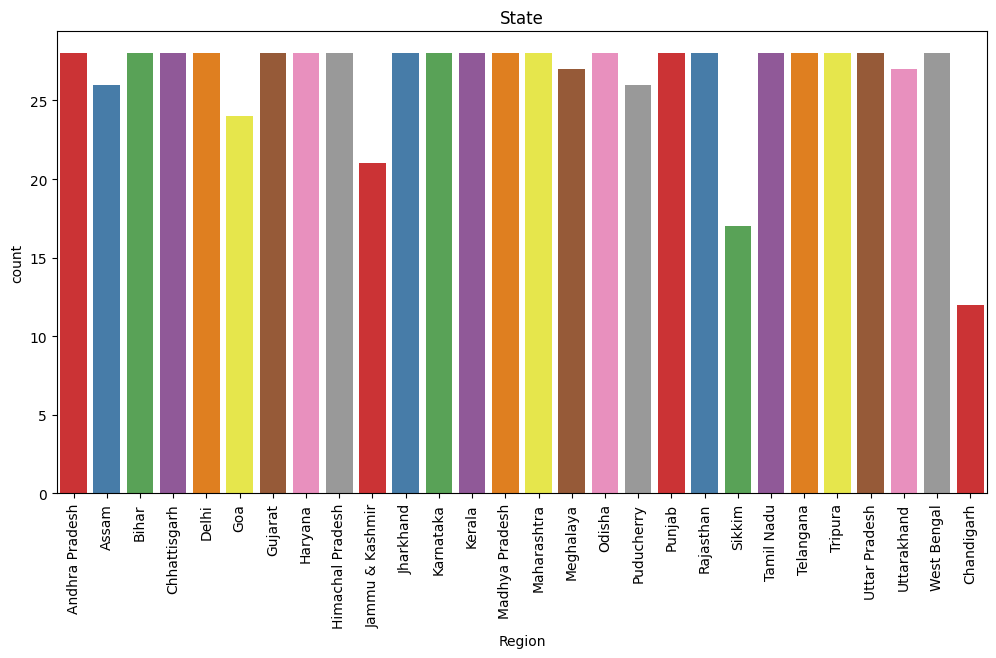

In [16]:
plt.figure(figsize=(12, 6))
sns.countplot(x=data['Region'],palette = "Set1")
plt.xticks(rotation='vertical')
plt.title('State')
plt.show();

**COUNTPLOT:RULAR v/s URBAN**

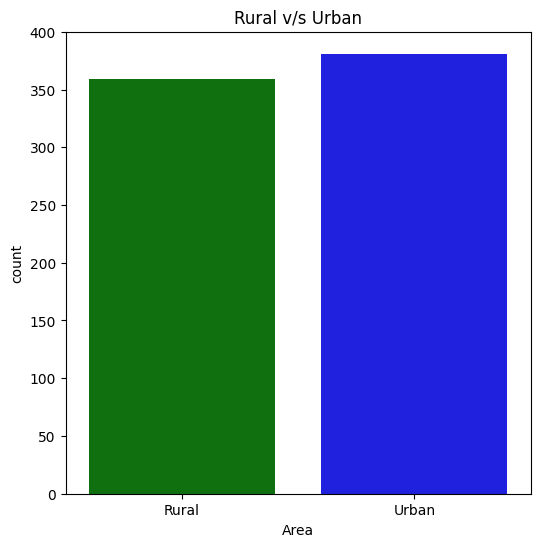

In [17]:
# value count for each category in ['Area'] column
data['Area'].value_counts()
plt.figure(figsize=(6, 6))
sns.countplot(x=data['Area'],palette = ['green','blue'])
plt.title('Rural v/s Urban')
plt.show()

**LINEPLOT:UNEMPLOYMENT RATE(%)**

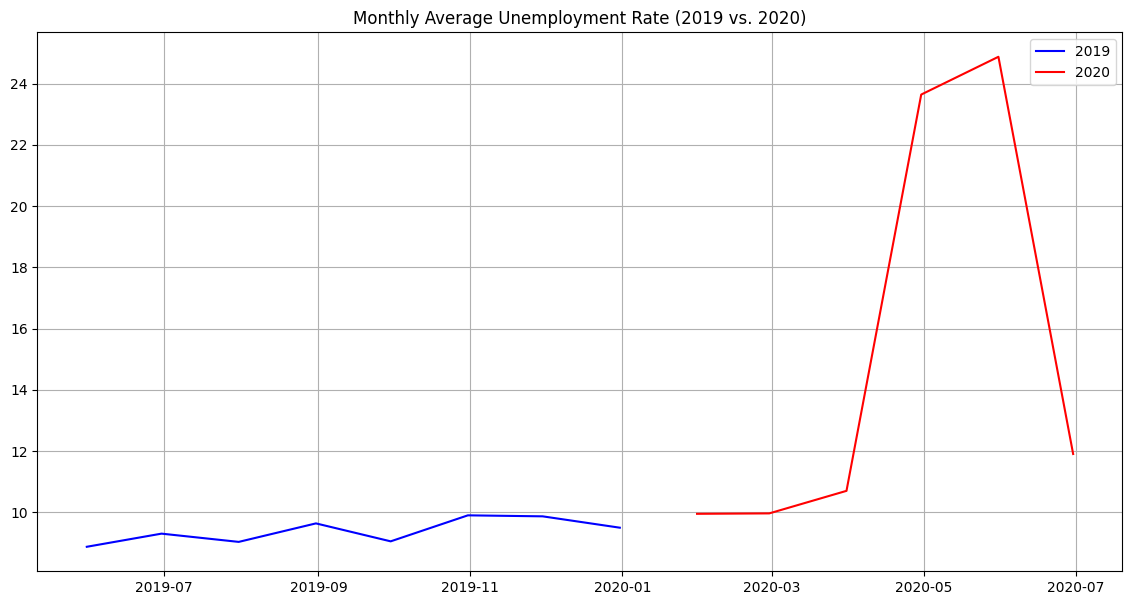

In [18]:
# Calculate the monthly average unemployment rate for each year
monthly_avg_2019 = data2019.groupby('Date')['Estimated_Unemployment_Rate(%)'].mean()
monthly_avg_2020 = data2020.groupby('Date')['Estimated_Unemployment_Rate(%)'].mean()

# Create a figure
fig = plt.figure(figsize=(14, 7))

# Add a grid
plt.grid(True)

# Add the two lines
plt.plot(monthly_avg_2019, label='2019', color='blue')
plt.plot(monthly_avg_2020, label='2020', color='red')

# Add a title
plt.title('Monthly Average Unemployment Rate (2019 vs. 2020)')

# Add a legend
plt.legend()

# Show the plot
plt.show();

**SCATTER PLOT**

In [19]:
# Concatenate the two datasets
combined_data = pd.concat([data2019, data2020], ignore_index=True)

In [20]:
# Create a scatter plot
fig = px.scatter(
    data_frame=combined_data,
    x='Estimated_Unemployment_Rate(%)',
    y='Region',
    color='year',
    color_continuous_scale='sunsetdark',
    height=600,
    width=900,
    animation_frame='year',  # Use 'Date' as the animation frame
    range_y=[combined_data['Region'].min(), combined_data['Region'].max()],
)

fig.update_layout(updatemenus=[dict(type='buttons',showactive=False,
                   buttons=[dict(label='Play',
                      method='animate',
                      args=[None,
                            {'frame': {'duration': 1000, 'redraw': False},
                             'fromcurrent': True,
                             'transition': {'duration': 100, 'easing': 'quadratic-in-out'}}]
                      )]
    )]
)

fig.show()

In [21]:
pairplot = data2019.drop(columns=['Date','day','month','year'])

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



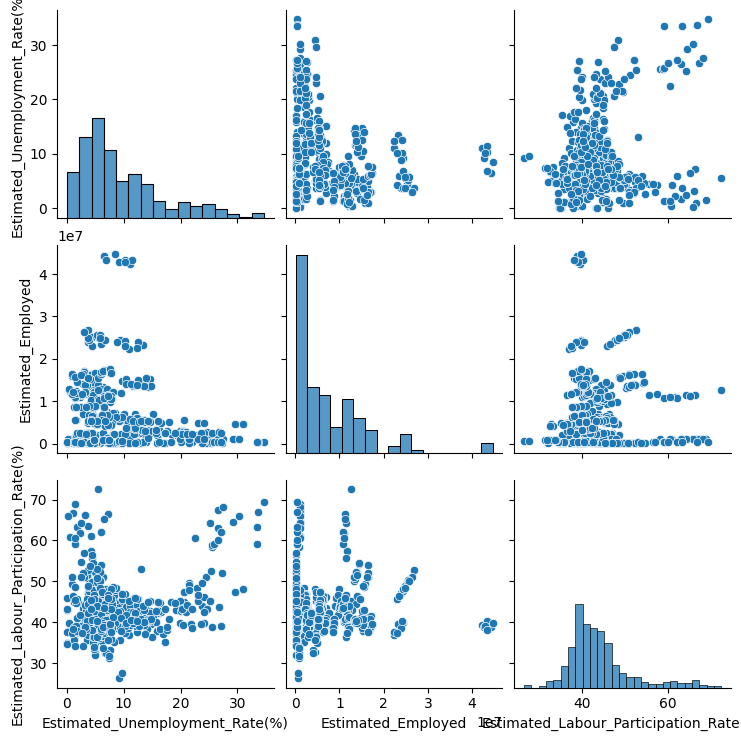

In [22]:
sns.pairplot(pairplot)

In [23]:
pairplot2 = data2020.drop(columns=['Date','day','month','year'])

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



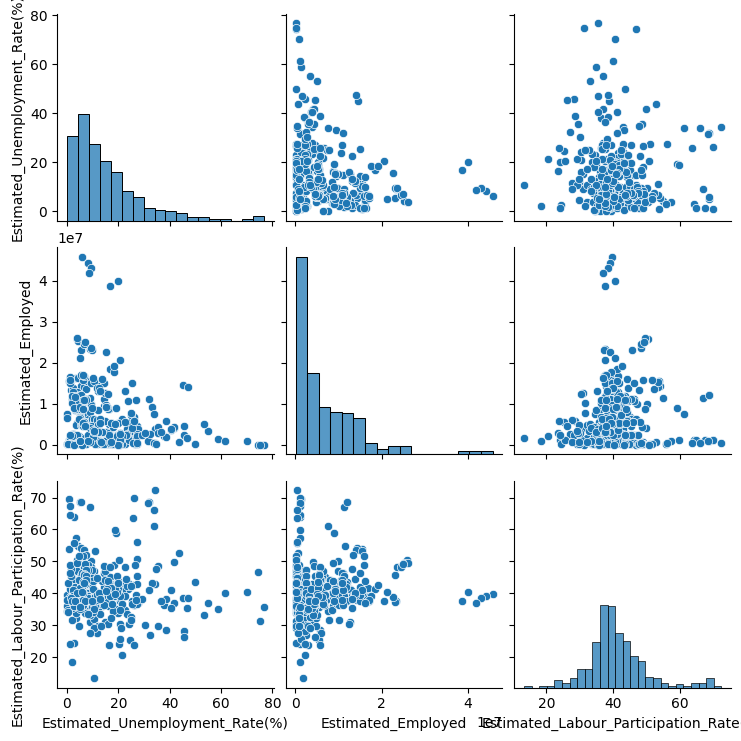

In [24]:
sns.pairplot(pairplot2)

**BOXPLOT: UNEMPLOYMENT RATE**

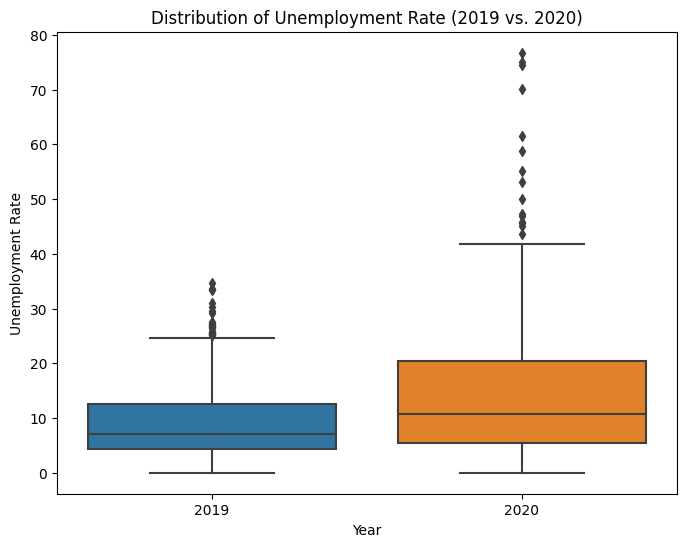

In [25]:
# Concatenate the two datasets
combined_data = pd.concat([data2019, data2020], ignore_index=True)

# Plot a box plot to compare the distribution of unemployment rates between the two years
plt.figure(figsize=(8, 6))
sns.boxplot(x=combined_data['Date'].dt.year, y=combined_data['Estimated_Unemployment_Rate(%)'])
plt.xlabel('Year')
plt.ylabel('Unemployment Rate')
plt.title('Distribution of Unemployment Rate (2019 vs. 2020)')

plt.show()

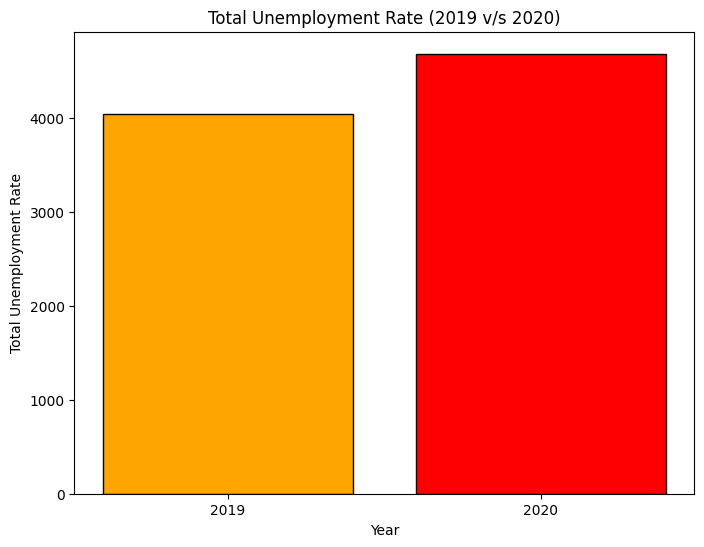

In [26]:
# Calculate the total unemployment rate for each year
total_2019 = data2019['Estimated_Unemployment_Rate(%)'].sum()
total_2020 = data2020['Estimated_Unemployment_Rate(%)'].sum()

# Create a bar plot to compare the total unemployment rate between the two years
plt.figure(figsize=(8, 6))
plt.bar(
    ['2019', '2020'],
    [total_2019, total_2020],
    color=['orange','red'],
     edgecolor='black', linewidth=1
)
plt.xlabel('Year')
plt.ylabel('Total Unemployment Rate')
plt.title('Total Unemployment Rate (2019 v/s 2020)')

plt.show();

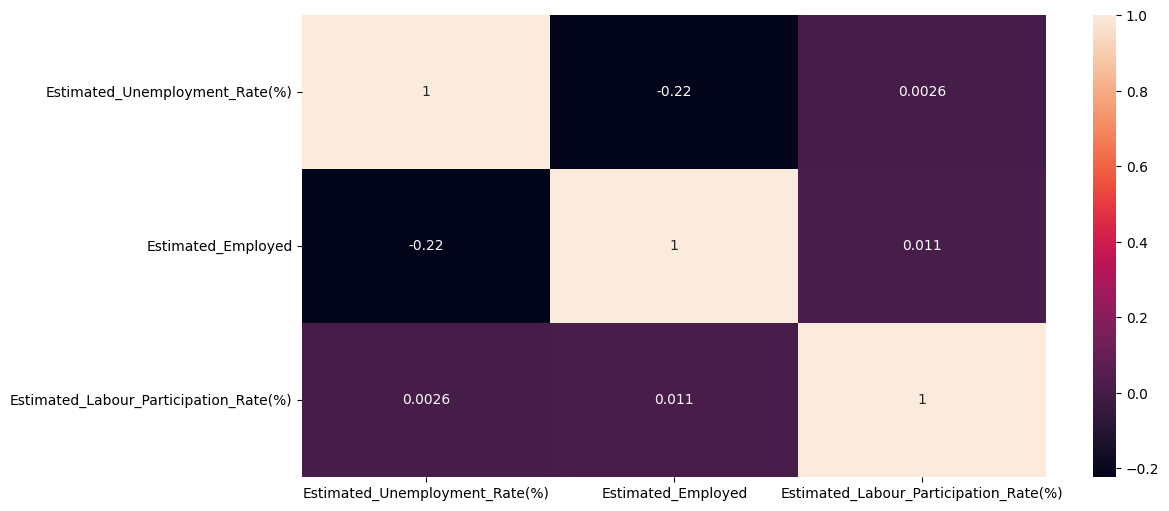

In [27]:
plt.figure(figsize=(12,6))
sns.heatmap(data[['Estimated_Unemployment_Rate(%)',
                'Estimated_Employed',
                'Estimated_Labour_Participation_Rate(%)']].corr(),
            annot=True
)
plt.show();